# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
print(y_train)

[ 0  0  0 ..., 42 42 42]


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [3]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[1].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(train['labels']))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

## some data exploration

In [5]:
labels = []
images = []

for f in range(0,len(train['features'])):
    images.append(train['features'][f])
    labels.append(train['labels'][f])

print("Unique Labels: {0}\nTotal Images: {1}".format(len(set(labels)), len(images)))

Unique Labels: 43
Total Images: 39209


In [6]:
labels_test = []
images_test = []

for f in range(0,len(test['features'])):
    images_test.append(test['features'][f])
    labels_test.append(test['labels'][f])

print("Unique Labels: {0}\nTotal Images: {1}".format(len(set(labels_test)), len(images_test)))

Unique Labels: 43
Total Images: 12630


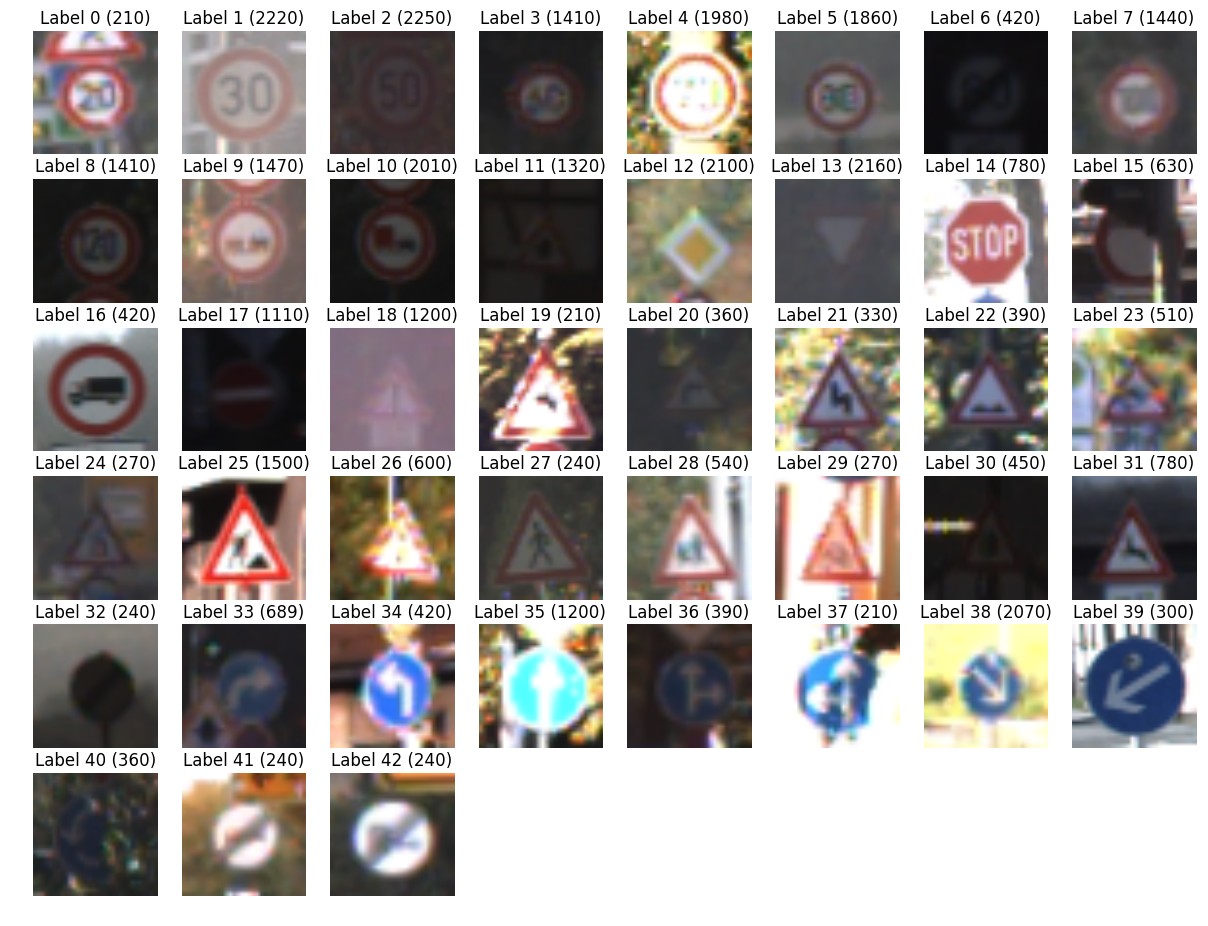

In [7]:
def display_images_labels(images, labels):
    #show the first image of each label
    unique_labels = set(labels)
    plt.figure(figsize=(15, 15))
    i = 1
    for label in unique_labels:
        image = images[labels.index(label)]
        plt.subplot(8, 8, i)  # A grid of 8 rows x 8 columns
        plt.axis('off')
        plt.title("Label {0} ({1})".format(label, labels.count(label)))
        i += 1
        _ = plt.imshow(image)
    plt.show()

display_images_labels(images, labels)

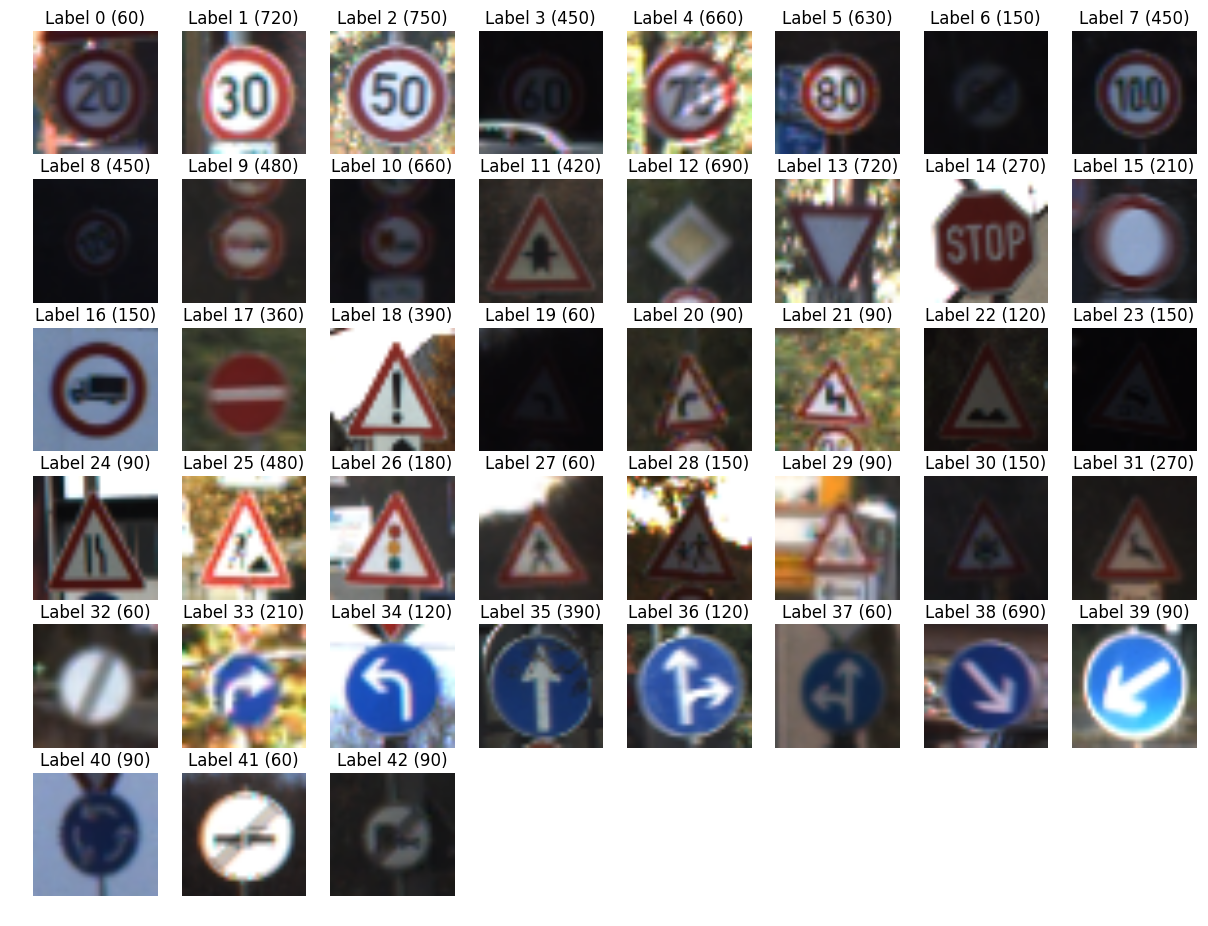

In [8]:
display_images_labels(images_test, labels_test)

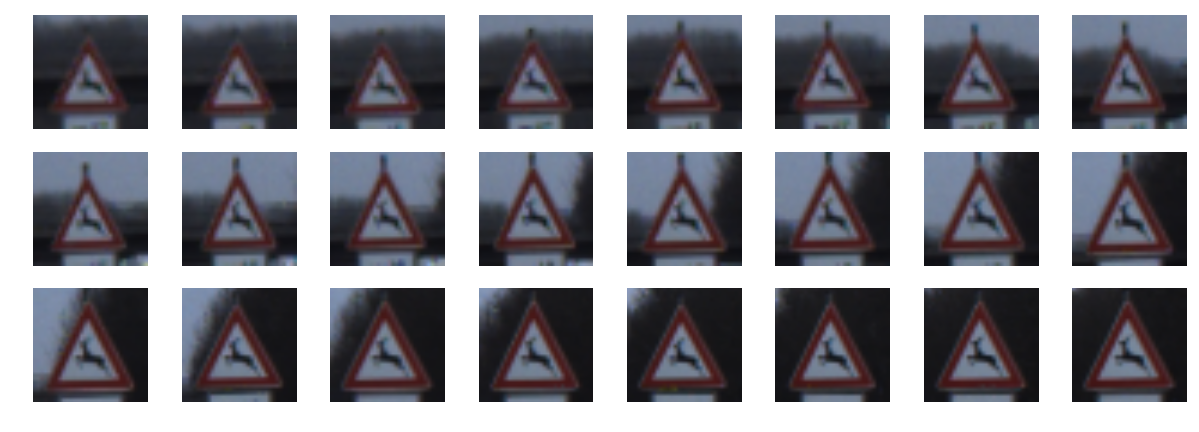

In [9]:
def display_images_label(images, labels, label):
    """Display only 1 class."""
    limit = 24  # show a max of 24 images
    plt.figure(figsize=(15, 5))
    i = 1

    indices=[i for i, x in enumerate(labels) if x == label]
    
    for idx in indices[:limit]:
        plt.subplot(3, 8, i)  # 3 rows, 8 per row
        plt.axis('off')
        i += 1
        plt.imshow(images[idx])
    plt.show()

display_images_label(images, labels, 31)

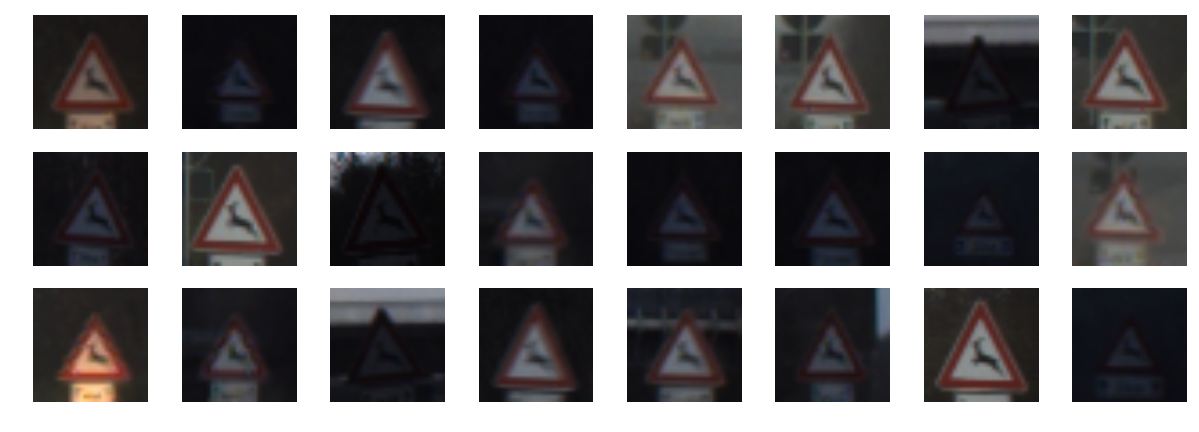

In [10]:
display_images_label(images_test, labels_test, 31)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

I chose to transform the images to grayscale, as the reduction of color channels does remove the relevant information. Furthermore, this reduces the size of the images. In the traffic sign case, this does not matter much, but if we had millions of inputs this would significantly increase the speed of the training algorithm - theroetically by 2/3, as the number of channels has been reduced from 3 to 1. Furthermore, I applied histogramm equalization, as this enhances the contrast, which in turn results in more easily detectable features. After having read a bit about the general proglems in traffic sign classification, I implemented another function which takes care of the position invariance of the pictures - it centers the picture in the 32 * 32 grid.

Finally, I used the label binarizer from Scikit in order to do one-hot encoding. I tried it with the one-hot-encoder from tensorflow, but found the former one to be more handy.

In [ ]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

In [ ]:
# could be used to generate additional data
from skimage import io
from skimage import transform as tf

# Load the image as a matrix
#image = io.imread("/path/to/your/image.jpg")

# Create Afine transform
afine_tf = tf.AffineTransform(shear=0.2)

# Apply transform to image data
modified = tf.warp(image, afine_tf)

# Display the result
io.imshow(modified)
io.show()

In [11]:
import numpy as np
import cv2

def preprocess(data):
    images = np.ndarray((data.shape[0], 32, 32, 1), dtype=np.uint8)
    for i, img in enumerate(data):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.equalizeHist(img)
        img = np.expand_dims(img, axis=2)
        images[i] = img
    return images

X_train = preprocess(X_train)
X_test = preprocess(X_test)

def center_normalize(data, mean, std):
    data = data.astype('float32')
    data -= mean
    data /= std
    return data

mean = np.mean(X_train)
std = np.std(X_train)

X_test_orig = []

for f in range(0,len(test['features'])):
    X_test_orig.append(test['features'][f])

X_train = center_normalize(X_train, mean, std)
X_test = center_normalize(X_test, mean, std)

In [46]:
from sklearn.preprocessing import LabelBinarizer

enc = LabelBinarizer().fit(y_train)
y_train_encoded = enc.transform(y_train)
y_test_encoded = enc.transform(y_test)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

For training, I submitted the data in batches, and additionally, I randomized the index positions of the training examples, which then does not provide whole training data to the algorithm, but a randomized subset. Each new training batch is created based on the randomized index values. For testing and I use the test data provided and calculate in each training iteration the cross-entropy based on the predicted and desired labels. For an instance x1, the desired output vector (one-hot-encoded) y1 has the value 1 at one position, indicating p=1 for a specific class. This is not the case for the predicted value. By calculating the cross-entropy for each iteration (= sum of all batches per iteration) I get an accuracy measure per iteration. Finally, I pick 10 random images and provide them to the model in order to see what it would predict.

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [13]:
import tensorflow as tf
import math
import datetime
import random
#from tqdm import tqdm

# Parameters
learning_rate = 0.0005
batch_size = 256
training_epochs = 100

n_classes = len(set(y_train))
dropout_prob = 0.5

keep_prob = tf.placeholder(tf.float32) #dropout (keep probability)

layer_width = {
    'layer_1': 64,
    'layer_2': 128,
    'layer_3': 256,
    'layer_4': 256,
    'fully_connected_1': 400,
    'fully_connected_2': 200
}

# Store layers weight & bias
weights = {
    'layer_1': tf.Variable(tf.truncated_normal([3, 3, 1, layer_width['layer_1']], stddev=0.001)),
    'layer_2': tf.Variable(tf.truncated_normal([3, 3, layer_width['layer_1'], layer_width['layer_2']], stddev=0.001)),
    'layer_3': tf.Variable(tf.truncated_normal([3, 3, layer_width['layer_2'], layer_width['layer_3']], stddev=0.001)),
    'layer_4': tf.Variable(tf.truncated_normal([3, 3, layer_width['layer_3'], layer_width['layer_4']], stddev=0.001)),
    'fully_connected_1': tf.Variable(tf.truncated_normal([4*4*256, layer_width['fully_connected_1']], stddev=0.001)),
    'fully_connected_2': tf.Variable(tf.truncated_normal([layer_width['fully_connected_1'], layer_width['fully_connected_2']], stddev=0.001)),
    'out': tf.Variable(tf.truncated_normal([layer_width['fully_connected_2'], n_classes], stddev=0.001))
}
biases = {
    'layer_1': tf.Variable(tf.zeros(layer_width['layer_1'])),
    'layer_2': tf.Variable(tf.zeros(layer_width['layer_2'])),
    'layer_3': tf.Variable(tf.zeros(layer_width['layer_3'])),
    'layer_4': tf.Variable(tf.zeros(layer_width['layer_4'])),
    'fully_connected_1': tf.Variable(tf.zeros(layer_width['fully_connected_1'])),
    'fully_connected_2': tf.Variable(tf.zeros(layer_width['fully_connected_2'])),
    'out': tf.Variable(tf.zeros(n_classes))
}

def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)


def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME')

# Create model
def conv_net(x, weights, biases, dropout):
    
    conv1 = conv2d(x, weights['layer_1'], biases['layer_1'])
    conv1 = maxpool2d(conv1)

    conv2 = conv2d(conv1, weights['layer_2'], biases['layer_2'])
    conv2 = maxpool2d(conv2)

    conv3 = conv2d(conv2, weights['layer_3'], biases['layer_3'])
    conv4 = conv2d(conv3, weights['layer_4'], biases['layer_4'])
    conv4 = maxpool2d(conv4)

    fc1 = tf.reshape(conv4, [-1, weights['fully_connected_1'].get_shape().as_list()[0]])
    
    fc1 = tf.add(tf.matmul(fc1, weights['fully_connected_1']), biases['fully_connected_1'])
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, dropout_prob)
    
    fc2 = tf.add(tf.matmul(fc1, weights['fully_connected_2']), biases['fully_connected_2'])
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, dropout_prob)
    
    out = tf.add(tf.matmul(fc2, weights['out']), biases['out'])
    
    return out

# tf Graph input
x = tf.placeholder("float", [None, 32, 32, 1])
y = tf.placeholder("float", [None, n_classes])
keep_prob = tf.placeholder(tf.float32)

logits = conv_net(x, weights, biases, keep_prob)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
predicted_labels = tf.argmax(logits, 1)

# Save model for evaluation
saver = tf.train.Saver()

# Initializing the variables
init = tf.global_variables_initializer()

#prepare saving the model
save_file='trafficSign_'+str(datetime.datetime.now())
saver=tf.train.Saver()

# Launch the graph
with tf.Session() as sess:    
    sess.run(init)
    for epoch in range(training_epochs):
        total_batch = int(n_train/batch_size)
        
        # shuffle data index for each epoch
        rand_idx = np.random.permutation(n_train)

        for i in range(total_batch):
            offset = i*batch_size
            off_end = offset+batch_size
            batch_idx = rand_idx[offset:off_end]
            
            batch_x = X_train[batch_idx]
            batch_y = y_train_encoded[batch_idx]

            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y, keep_prob: dropout_prob})
        
        cost_ts, acc_ts = sess.run([cost, accuracy], feed_dict={x: X_test, y: y_test_encoded, keep_prob: 1.})

        print("Epoch:", '%04d' % (epoch+1))
        print("Cost:  {:.5f}  | Accuracy:  {:.5f}".format(cost_ts, acc_ts))
    
    save_path = saver.save(sess, save_file)
    print("Optimization Finished!")
    
    #save the model
    saver.save(sess, save_file)

    # Test model
    print(tf.argmax(logits, 1))
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))

Epoch: 0001
Cost:  3.36390  | Accuracy:  0.05732
Epoch: 0002
Cost:  2.53132  | Accuracy:  0.22067
Epoch: 0003
Cost:  1.92581  | Accuracy:  0.37870
Epoch: 0004
Cost:  1.62572  | Accuracy:  0.47110
Epoch: 0005
Cost:  1.41374  | Accuracy:  0.53745
Epoch: 0006
Cost:  1.23463  | Accuracy:  0.60420
Epoch: 0007
Cost:  1.05336  | Accuracy:  0.66880
Epoch: 0008
Cost:  0.94035  | Accuracy:  0.70174
Epoch: 0009
Cost:  0.84673  | Accuracy:  0.74283
Epoch: 0010
Cost:  0.74945  | Accuracy:  0.77458
Epoch: 0011
Cost:  0.64711  | Accuracy:  0.80372
Epoch: 0012
Cost:  0.62394  | Accuracy:  0.81876
Epoch: 0013
Cost:  0.58811  | Accuracy:  0.83238
Epoch: 0014
Cost:  0.60931  | Accuracy:  0.83967
Epoch: 0015
Cost:  0.52699  | Accuracy:  0.85424
Epoch: 0016
Cost:  0.52658  | Accuracy:  0.85859
Epoch: 0017
Cost:  0.46975  | Accuracy:  0.87340
Epoch: 0018
Cost:  0.48200  | Accuracy:  0.87973
Epoch: 0019
Cost:  0.50729  | Accuracy:  0.87245
Epoch: 0020
Cost:  0.42837  | Accuracy:  0.89002
Epoch: 0021
Cost:  0

In [ ]:
### Train your model here.
### Feel free to use as many code cells as needed.

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


I decided to use the Adam Optimizer, as in my verification it gave me better results than the gradient decent optimizer. I started with batch size 128, but finally ended up with a size of 256, as I wanted to avoid big fluctuations in the gradient direction, and on the other hand my machine did not suffer from memory problems with that size, so it seemed to be a good compromise. I experimented with 10 - 100 training epochs, whereas 40 - 50 seems to be sufficient, and 100 may be an overkill, although through dropout overfitting is prevented; finally, I nevertheless decided to go for 100. I also experimented a lot with the number of layers and layer-width, starting with 'layer_1': 32, 'layer_2': 64,'layer_3': 128, 'fully_connected': 512, 'fully_connected': 1024, continued to reduce the weights in the first layer, saw that this does not positively affect accuracy, added 2 more convolutional layers, pooling, dropout (starting with 75%, finally ending up with 50%), added 2 fully connected layers instead of just one and flattened the output. This is the final architecture:

Conv: (32, 32, 64)
Pool: (16, 16, 64)
Conv: (16, 16, 128)
Pool: (8, 8, 128)
Conv: (8, 8, 256)
Conv: (8, 8, 256)
Pool: (4, 4, 256)
Flatten: (2048)
FullyConnected: (400)
Dropout 0.5
FullyConnected: (200)
Dropout 0.5
Output: (43)

I also found this master's thesis very useful: publications.lib.chalmers.se/records/fulltext/245747/245747.pdf

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I would prefer to say that my solution is an educated guess instead of trial and error only. Any time I develop neural networks, I define a search framework around the hyperparameters, thus start with a number of neurons and layers that have been well suited for other problems I worked on, such as facial or emotion recognition. I experimented a lot with genetic algorithms for searching hyperparameters, but if the solution does not run in a well-performing cloud architecture, the educated guess is still a solution that allows me to find a suitable architecture a lot quicker. Usually, I start with training a solution only for 5 or 10 epochs and see how the error reduces or what the second or third error is compared to the first error. If there is only slight change, the architecture is not correct and I give it a try with a slightly more complex one. Usually, I start with the simplest architecture, which comprises only one hidden layer and no convolution at all.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

**Answer:**

I used the new data provided by one of our classmates from https://github.com/KonArtist02/CarND-Traffic-Sign-Classifier-Project/blob/master/Traffic_Sign_Classifier.ipynb

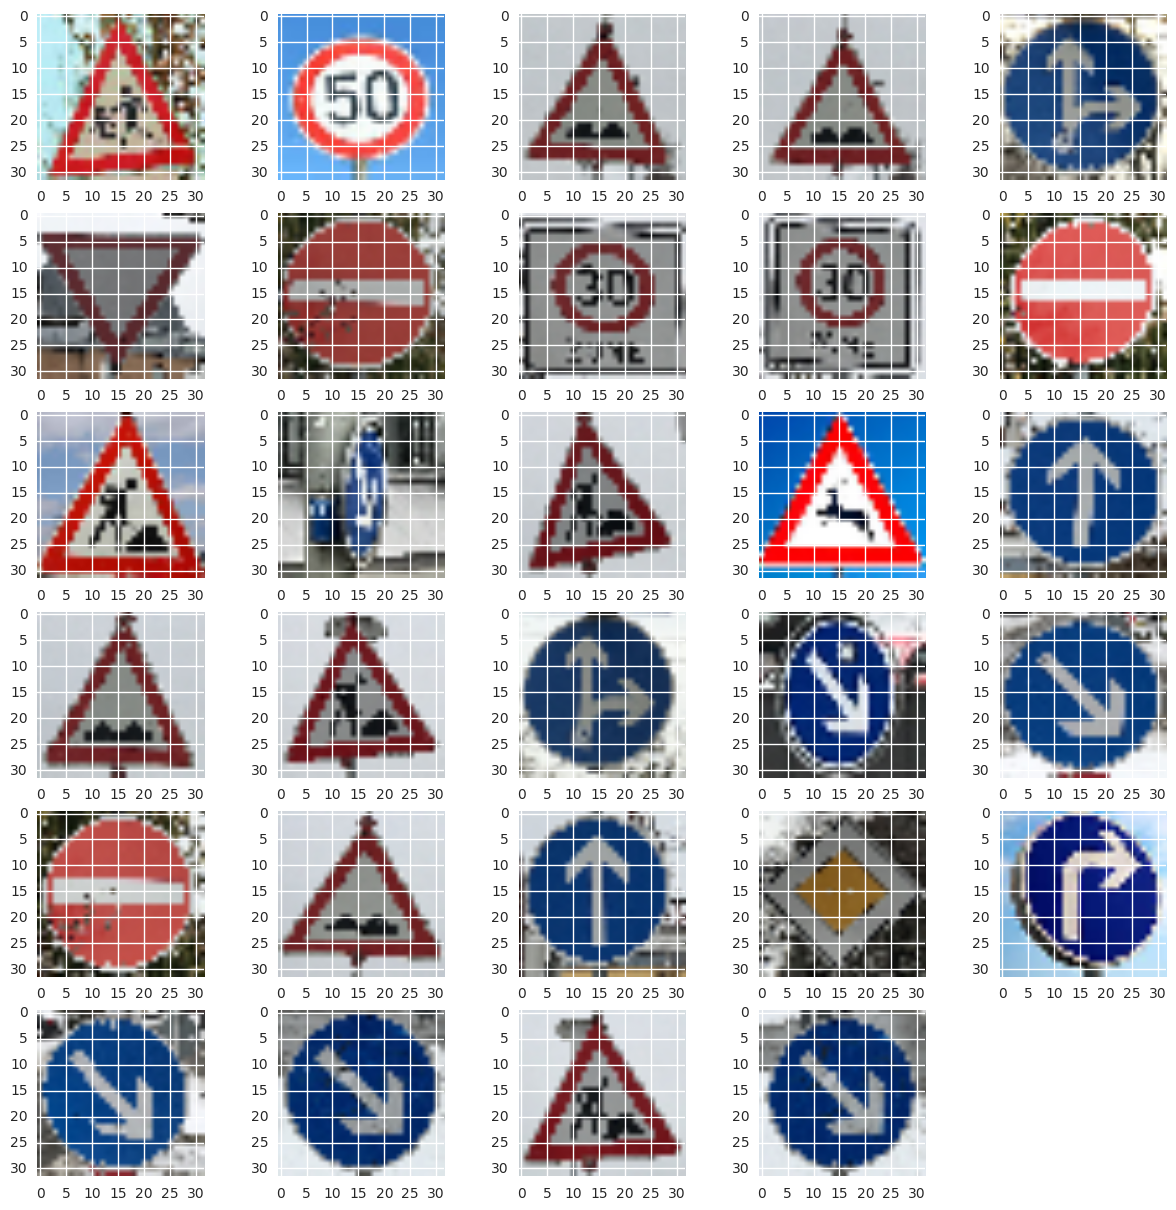

In [130]:
%matplotlib inline

new_signs_file = "new_data/new_signs.p"

with open(new_signs_file, mode='rb') as f:
    new_signs = pickle.load(f)
    f.close()

X_new = new_signs['data']
y_new = new_signs['labels']

plt.figure(figsize=(15,15))
for i in range(y_new.size):
    plt.subplot(6,5,i+1)
    plt.imshow(X_new[i])

In [131]:
labels_new = []
images_new = []

for f in range(0,len(new_signs['data'])):
    images_new.append(new_signs['data'][f])
    labels_new.append(new_signs['labels'][f])

print("Unique Labels: {0}\nTotal Images: {1}".format(len(set(labels_new)), len(images_new)))

X_new = preprocess(X_new)
X_new_orig = []

for f in range(0,len(new_signs['data'])):
    X_new_orig.append(new_signs['data'][f])
    
    X_new = center_normalize(X_new, mean, std)

#enc = LabelBinarizer().fit(y_new)

enc = LabelBinarizer().fit(y_train)
y_new_encoded = enc.transform(y_new)

Unique Labels: 13
Total Images: 29


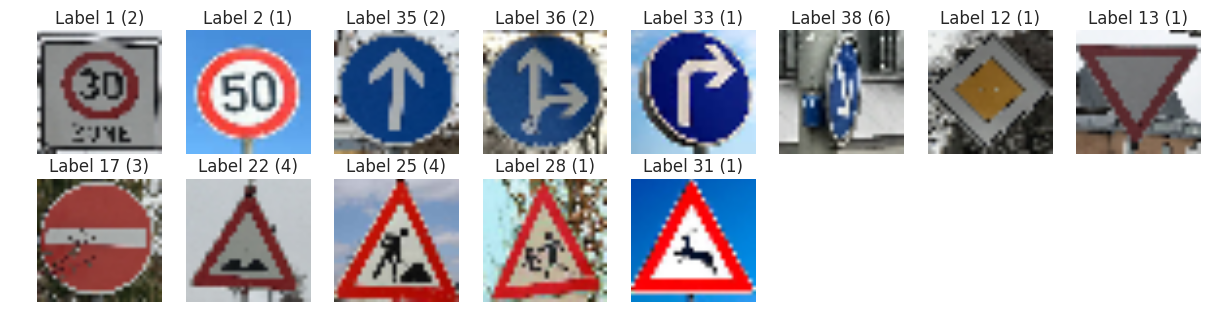

In [132]:
display_images_labels(images_new, labels_new)

In [16]:
import os
os.listdir(".")

['.DS_Store',
 '.git',
 '.gitignore',
 '.ipynb_checkpoints',
 'Convolutional ANN.ipynb',
 'README.md',
 'Traffic_Sign_Classifier.ipynb',
 'checkpoint',
 'environment.yml',
 'new_data',
 'signnames.csv',
 'submission',
 'traffic-signs-data',
 'trafficSign_2017-01-08 09:48:00.673181.data-00000-of-00001',
 'trafficSign_2017-01-08 09:48:00.673181.index',
 'trafficSign_2017-01-08 09:48:00.673181.meta',
 'trafficSign_2017-01-12 18:49:45.767418.data-00000-of-00001',
 'trafficSign_2017-01-12 18:49:45.767418.index',
 'trafficSign_2017-01-12 18:49:45.767418.meta',
 'valeeda.ipynb']

**validation on test data**

[7, 1, 11, 25, 25, 18, 1, 33, 3, 4]
[ 7  1 11 25 25 18  1 33  3  4]


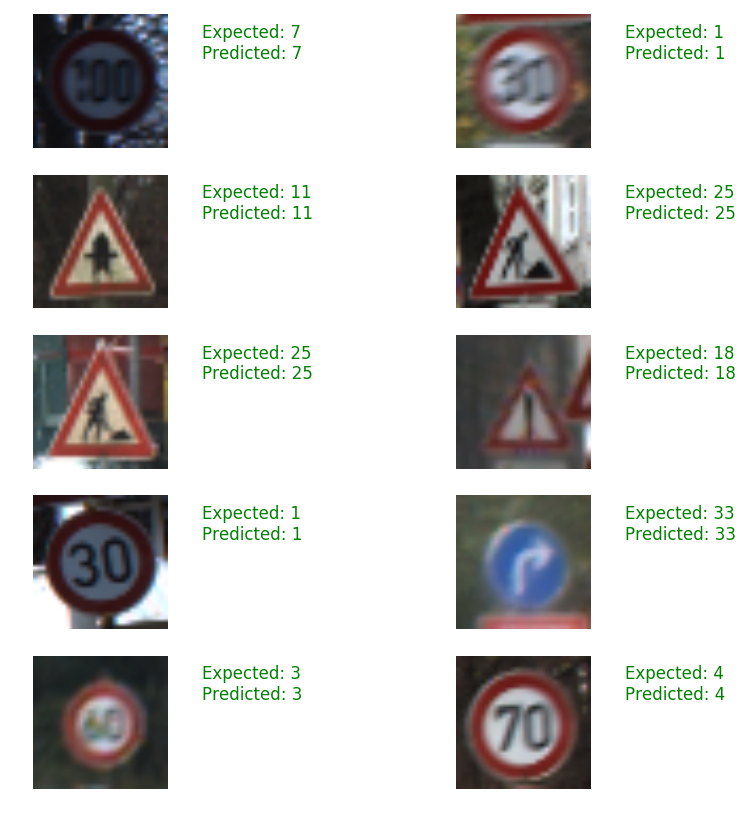

In [17]:
with tf.Session() as sess:
    saver.restore(sess, "./trafficSign_2017-01-12 18:49:45.767418")
    # Pick 10 random images
    sample_indexes = random.sample(range(len(X_test)), 10)
    sample_images = [X_test[i] for i in sample_indexes]
    sample_labels = [y_test[i] for i in sample_indexes]

    predicted = sess.run([predicted_labels],feed_dict={x: sample_images})[0]
    print(sample_labels)
    print(predicted)


    # Show actual vs. predicted
    fig = plt.figure(figsize=(10, 10))
    for i in range(len(sample_images)):
        truth = sample_labels[i]
        prediction = predicted[i]
        plt.subplot(5, 2,1+i)
        plt.axis('off')
        color='green' if truth == prediction else 'red'
        plt.text(40, 10, "Expected: {0}\nPredicted: {1}".format(truth, prediction), fontsize=12, color=color)
        plt.imshow(X_test_orig[sample_indexes[i]])

In [93]:
pr = tf.argmax(logits, 1)
tk = tf.nn.top_k(logits, 5)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, y))

correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

#init = tf.global_variables_initializer()

with tf.Session() as sess:
    saver.restore(sess, "./trafficSign_2017-01-12 18:49:45.767418")
    c, acc, top_k, preds = sess.run([cost, accuracy, tk, pr], feed_dict={x: X_test, y: y_test_encoded, keep_prob: 1.})
    print("Test Accuracy = {:.3f}".format(acc))

Test Accuracy = 0.938


**validation on new data**

[25, 28, 38, 2, 22, 12, 25, 1, 38, 38]
[25, 28, 38, 2, 22, 12, 25, 1, 38, 38]


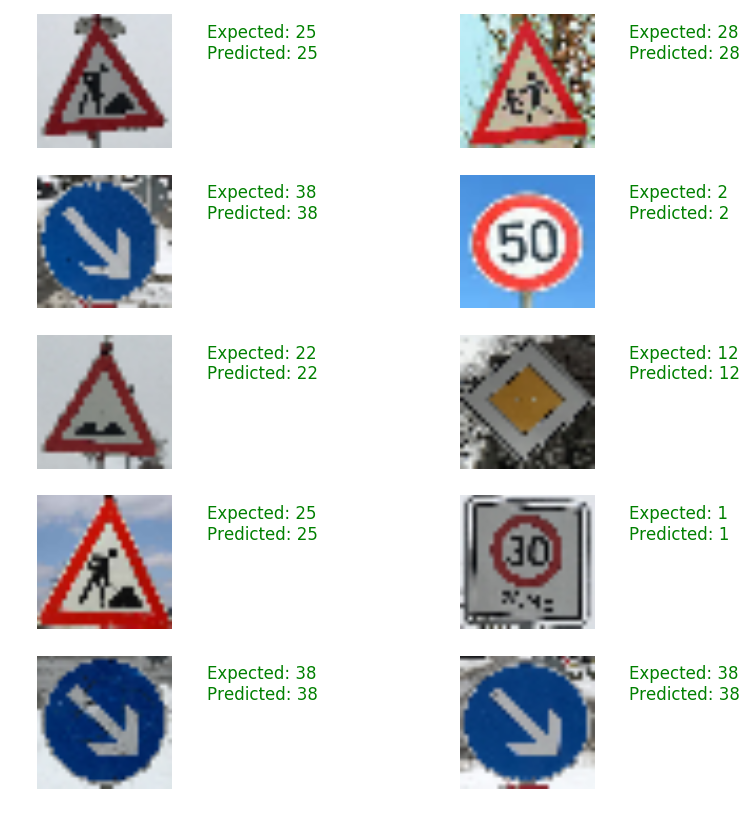

In [159]:
import tensorflow as tf

#saver = tf.train.Saver()

with tf.Session() as sess:
    saver.restore(sess, "./trafficSign_2017-01-12 18:49:45.767418")
    # Pick 10 random images
    sample_indexes = random.sample(range(len(X_new)), 10)
    sample_images = [X_new[i] for i in sample_indexes]
    sample_labels = [y_new[i] for i in sample_indexes]

    predicted = sess.run([predicted_labels],feed_dict={x: sample_images})[0]
    print(sample_labels)
    print(predicted)


    # Show actual vs. predicted
    fig = plt.figure(figsize=(10, 10))
    for i in range(len(sample_images)):
        truth = sample_labels[i]
        prediction = predicted[i]
        plt.subplot(5, 2,1+i)
        plt.axis('off')
        color='green' if truth == prediction else 'red'
        plt.text(40, 10, "Expected: {0}\nPredicted: {1}".format(truth, prediction), fontsize=12, color=color)
        plt.imshow(X_new_orig[sample_indexes[i]])

In [134]:
pr = tf.argmax(logits, 1)
tk = tf.nn.top_k(logits, 5)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, y))

correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

#init = tf.global_variables_initializer()

with tf.Session() as sess:
    saver.restore(sess, "./trafficSign_2017-01-12 18:49:45.767418")
    c, acc, top_k, preds = sess.run([cost, accuracy, tk, pr], feed_dict={x: X_new, y: y_new_encoded, keep_prob: 1.})
    print("Test Accuracy = {:.3f}".format(acc))

Test Accuracy = 0.138


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

I provided 10 random samples in the output after the training above. The problem in the picture with the expected label 42 is the bad (real-world) quality of the test data. Both test data from labels 42 and 41 look very similar. The predictions with labels 9, 6, 7 are actually worse, but the neural network seems to have recoginzed the revant features within the images. When we look at misclassification of a 27 as 30, then it becomes obvious that this is also because of the quality of the test and training data, and there are some few good quality 27s in the test, which look as if they are 30s from the training.

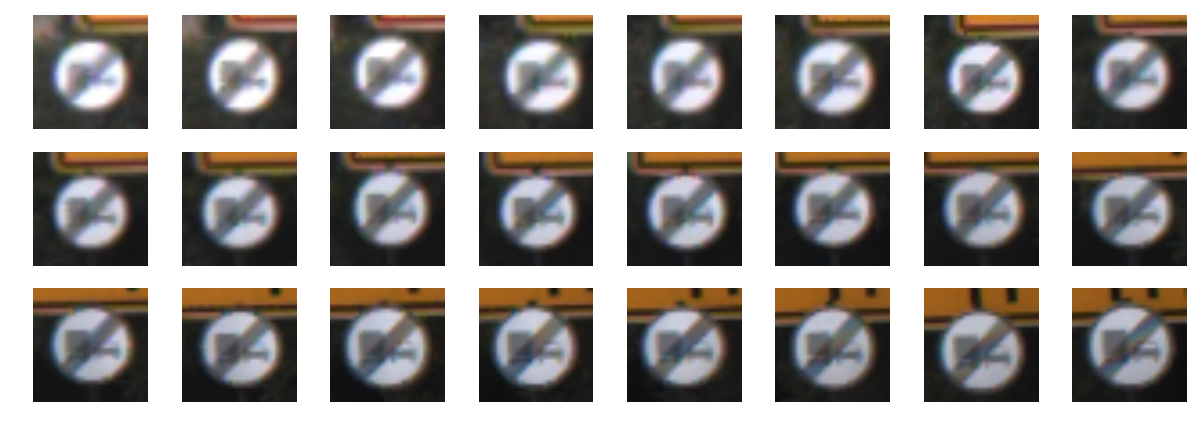

In [153]:
display_images_label(images, labels, 42)

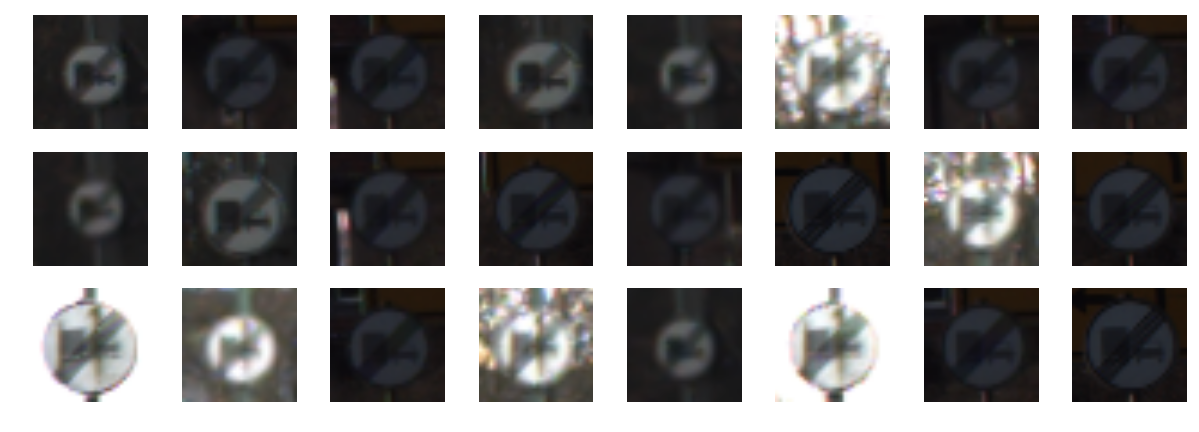

In [152]:
display_images_label(images_test, labels_test, 42)

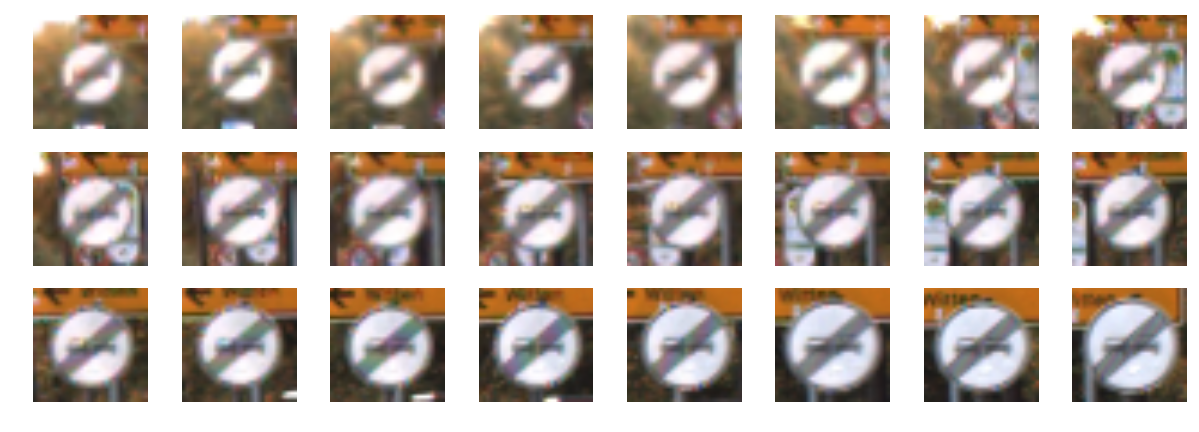

In [171]:
display_images_label(images, labels, 41)

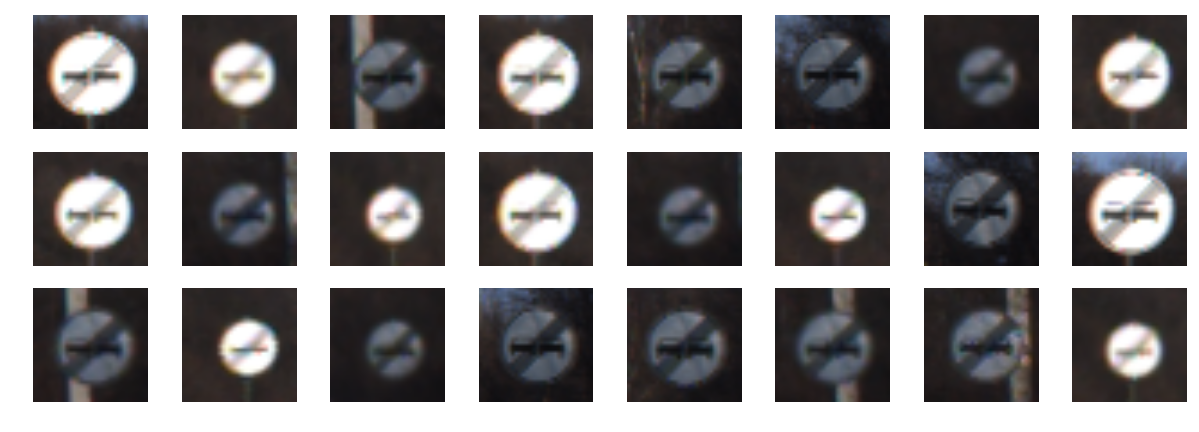

In [151]:
display_images_label(images_test, labels_test, 41)

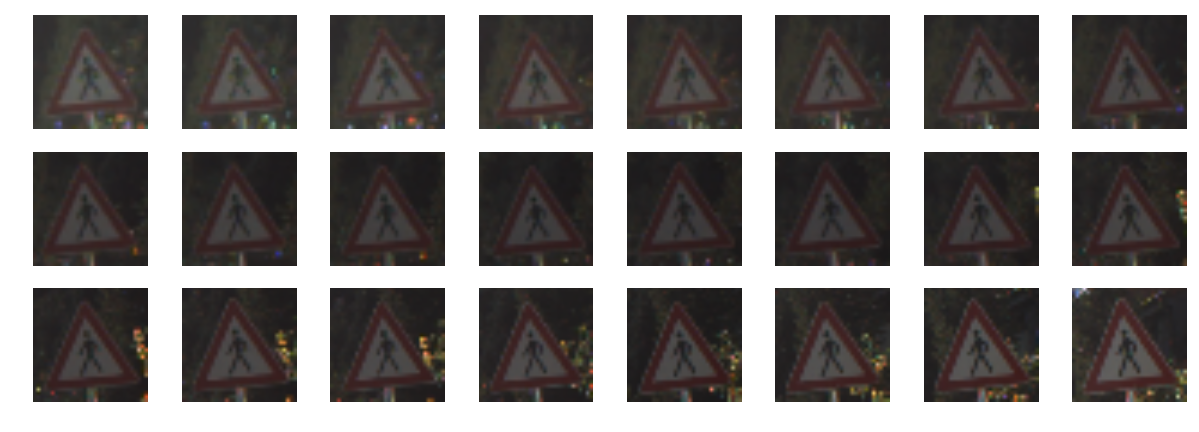

In [167]:
display_images_label(images, labels, 27)

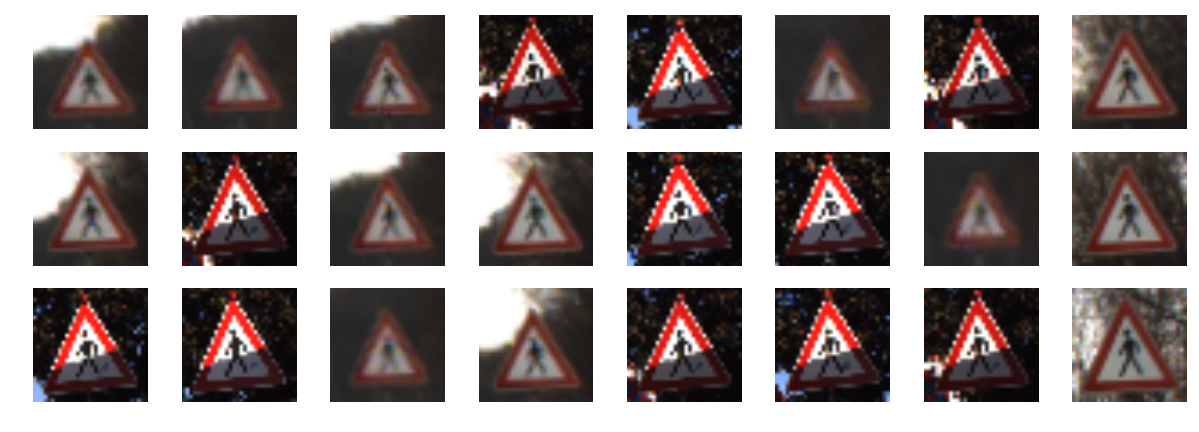

In [170]:
display_images_label(images_test, labels_test, 27)

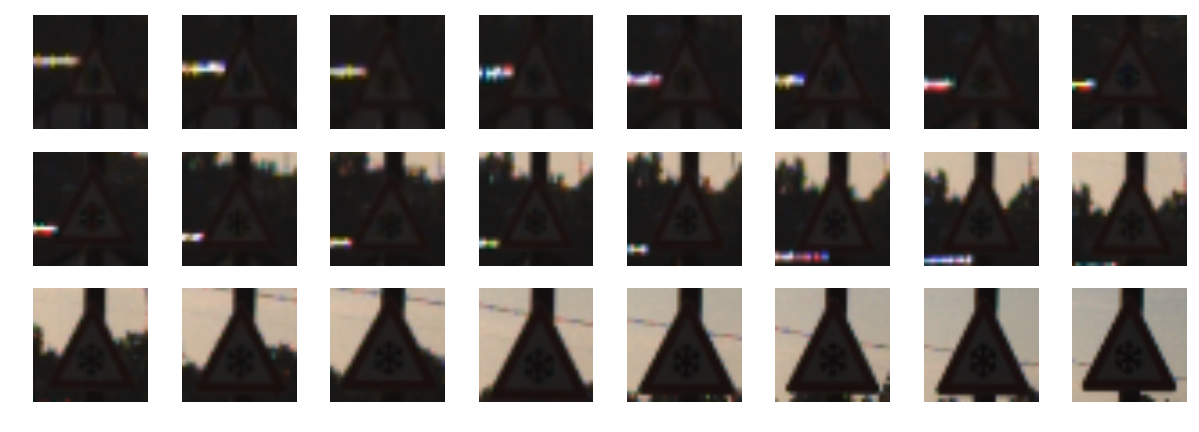

In [168]:
display_images_label(images, labels, 30)

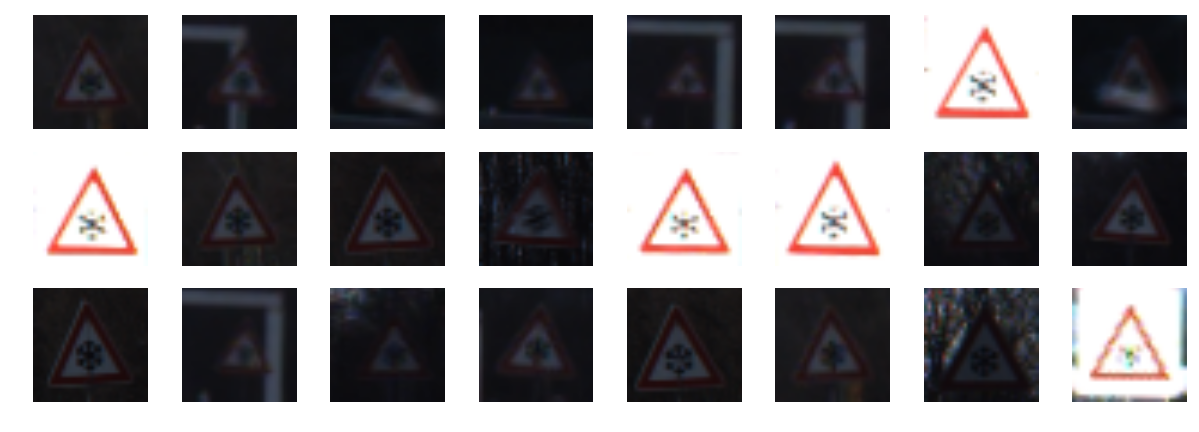

In [169]:
display_images_label(images_test, labels_test, 30)

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

All in all, it perform better on the training data than on the test data, which is because it has not seen the new data before. I could have achieved even better performance on the training data by reducing dropout, more likely resulting in even worse performance on test data due to overfitting.

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

The charts below show the predicted classes on the x-axis, and the (top 5) logit score on the y-axis.

In [154]:
import os
os.listdir(".")

['.DS_Store',
 '.git',
 '.gitignore',
 '.ipynb_checkpoints',
 'Convolutional ANN.ipynb',
 'README.md',
 'Traffic_Sign_Classifier.ipynb',
 'checkpoint',
 'environment.yml',
 'signnames.csv',
 'traffic-signs-data',
 'trafficSign_2017-01-08 09:48:00.673181.data-00000-of-00001',
 'trafficSign_2017-01-08 09:48:00.673181.index',
 'trafficSign_2017-01-08 09:48:00.673181.meta',
 'valeeda.ipynb']

**show top 10 in test data**

Cost:  0.40935  | Accuracy:  0.94078
Predicted: 16 | Expected: 16


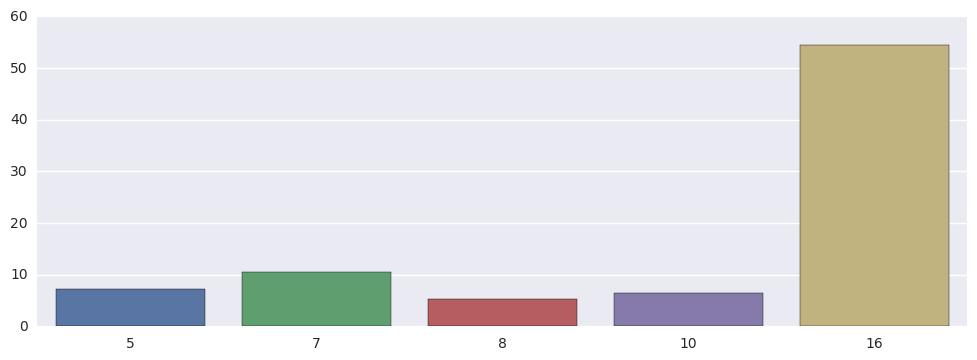

Predicted: 1 | Expected: 1


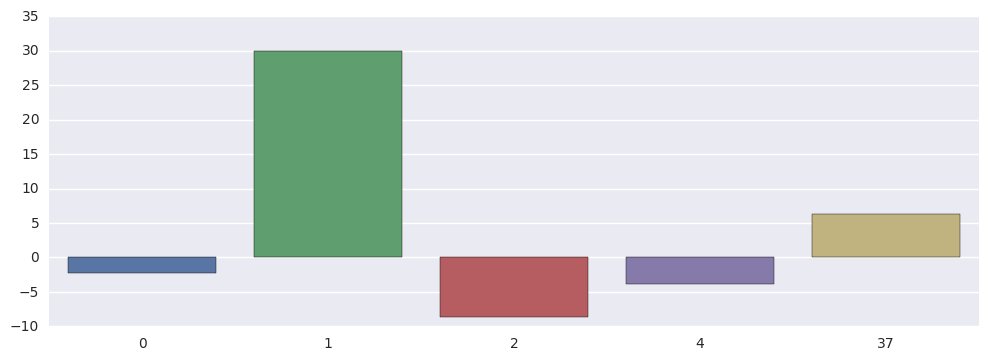

Predicted: 38 | Expected: 38


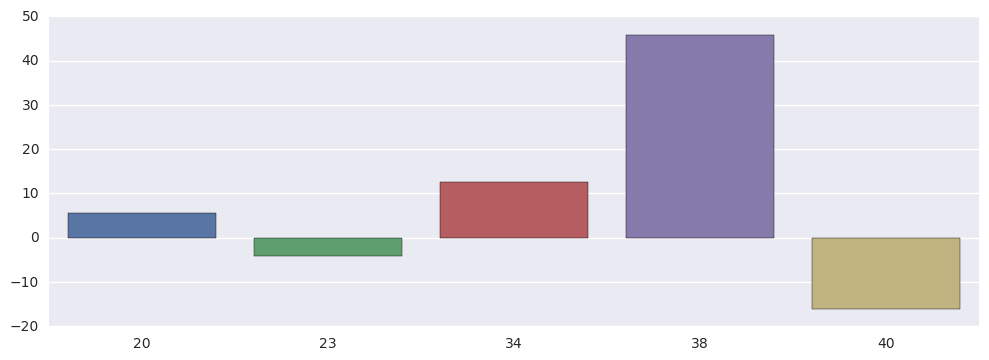

Predicted: 33 | Expected: 33


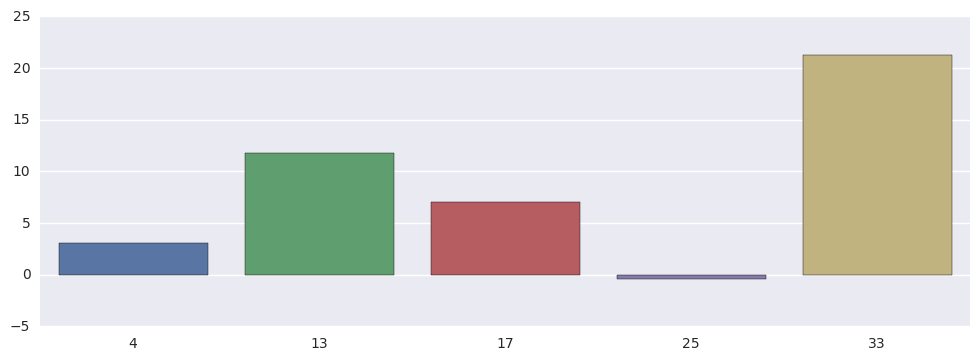

Predicted: 11 | Expected: 11


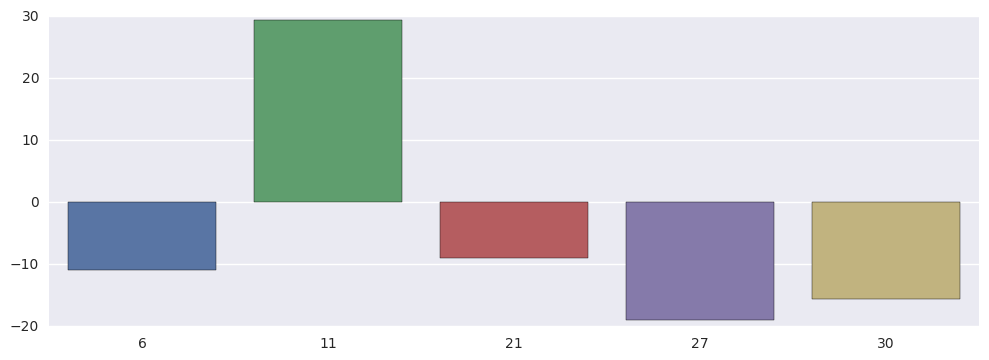

Predicted: 38 | Expected: 38


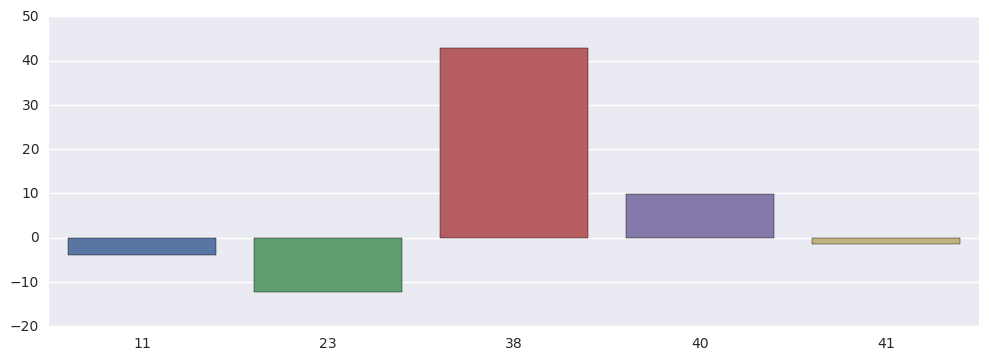

Predicted: 18 | Expected: 18


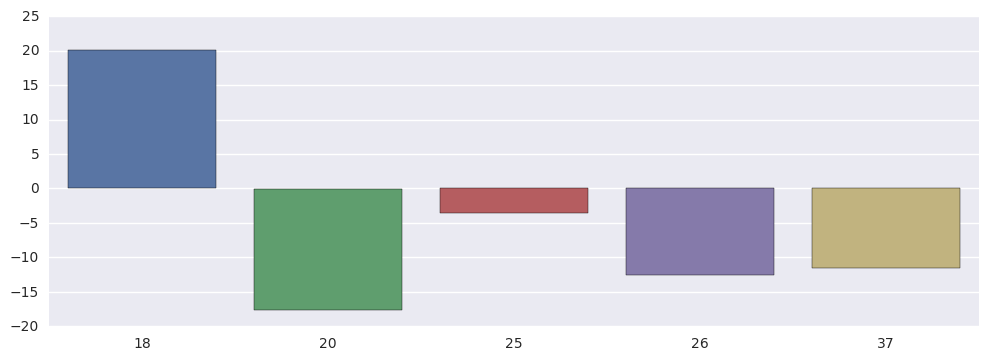

Predicted: 12 | Expected: 12


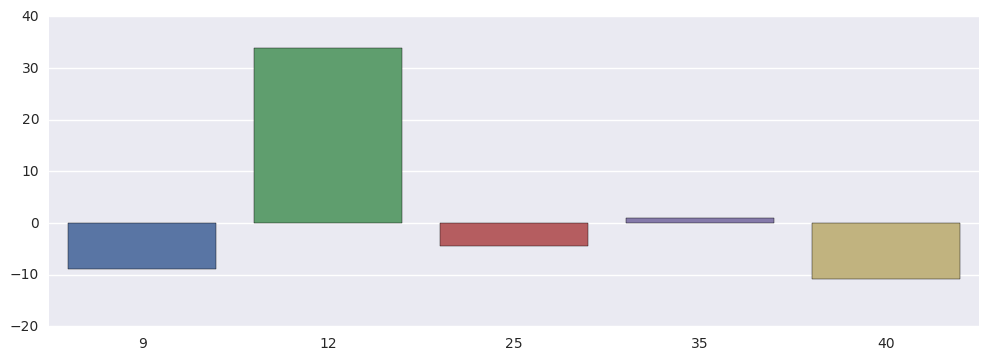

Predicted: 25 | Expected: 25


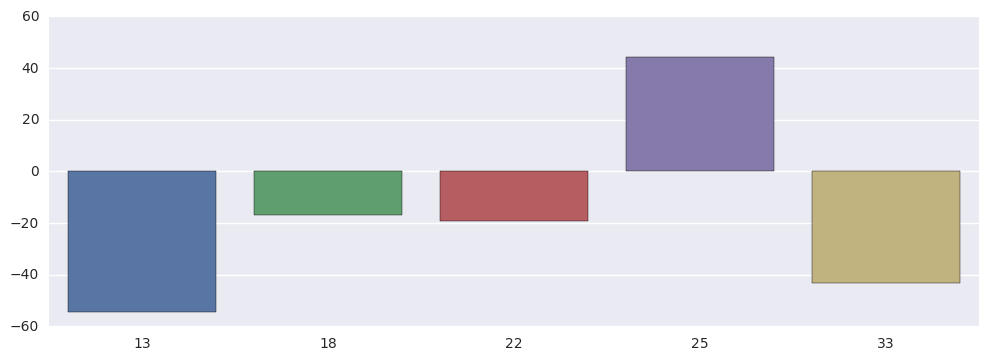

Predicted: 35 | Expected: 35


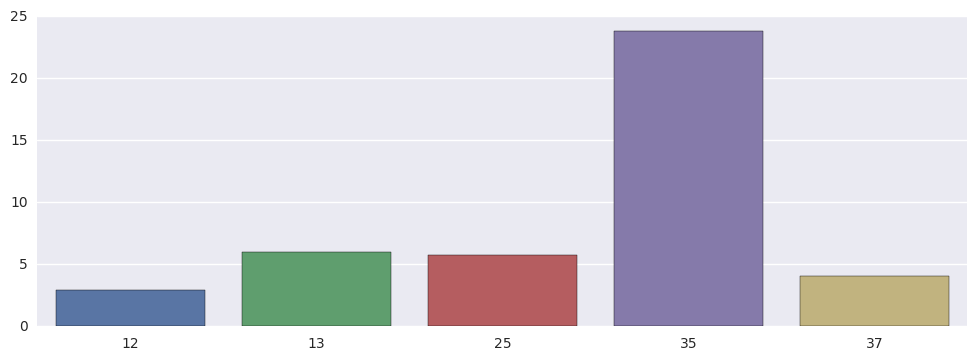

In [137]:
import seaborn as sb

pr = tf.argmax(logits, 1)
tk = tf.nn.top_k(logits, 5)

with tf.Session() as sess:
    saver.restore(sess, "./trafficSign_2017-01-12 18:49:45.767418")
    c, acc, top_k, preds = sess.run([cost, accuracy, tk, pr], feed_dict={x: X_test, y: y_test_encoded, keep_prob: 1.})
         #cost_ts, acc_ts = sess.run([cost, accuracy], feed_dict={x: X_test, y: y_test_encoded, keep_prob: 1.})
    print("Cost:  {:.5f}  | Accuracy:  {:.5f}".format(c, acc))
    
for i in range(10):
    #print(images_test[i])
    print("Predicted: {} | Expected: {}".format(preds[i], y_test[i]))
    fig = plt.figure(figsize=(12,4))
    sb.barplot(x=top_k[1][i], y=top_k[0][i])
    plt.show()

**show top 10 in training data**

Cost:  0.00756  | Accuracy:  0.99763
Predicted: 0 | Expected: 0


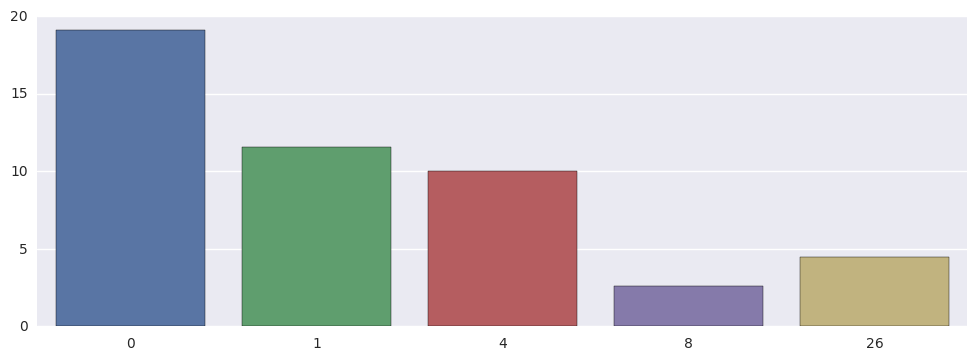

Predicted: 0 | Expected: 0


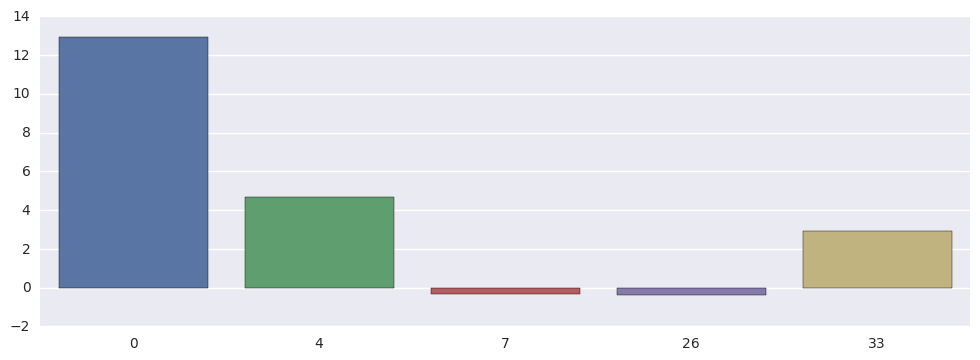

Predicted: 0 | Expected: 0


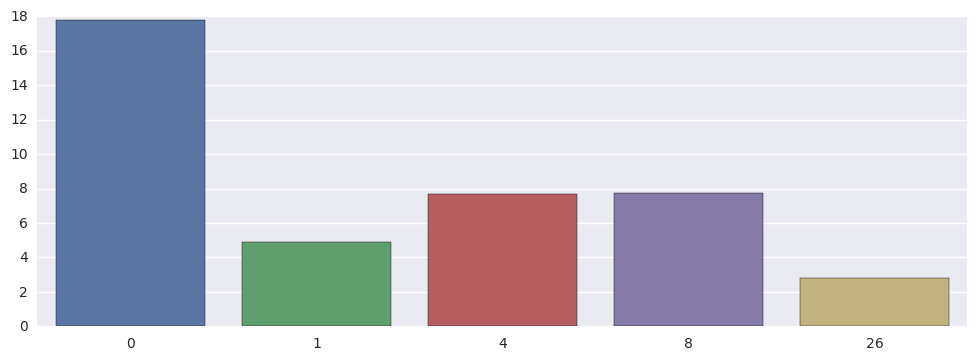

Predicted: 0 | Expected: 0


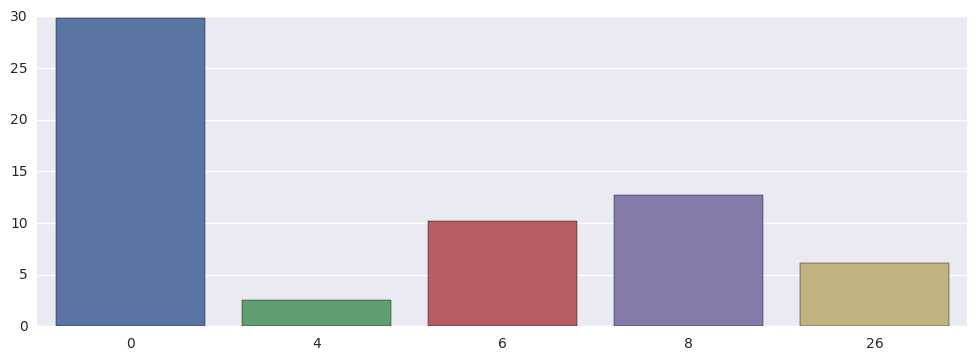

Predicted: 0 | Expected: 0


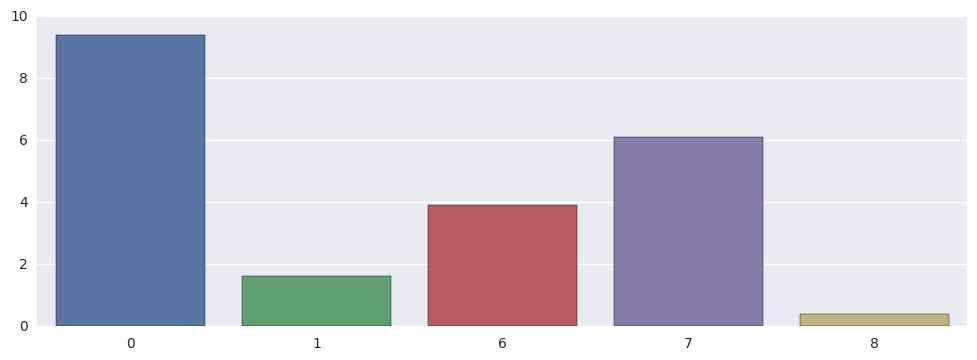

Predicted: 0 | Expected: 0


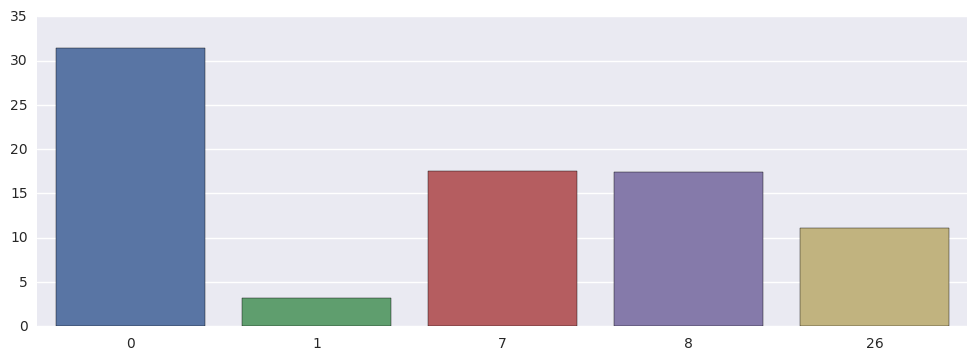

Predicted: 0 | Expected: 0


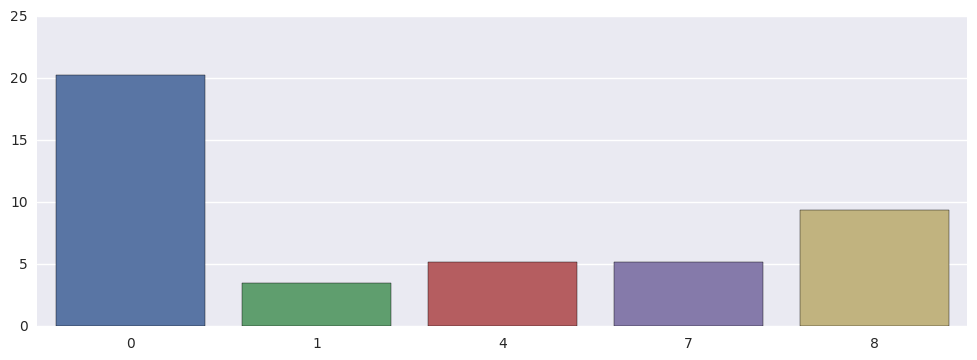

Predicted: 0 | Expected: 0


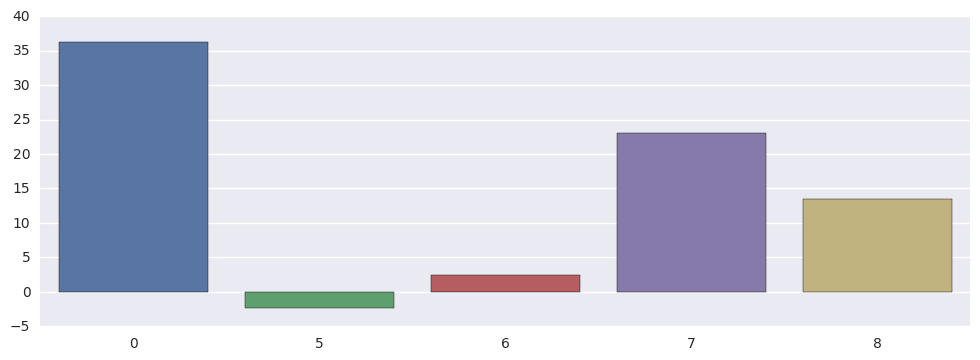

Predicted: 0 | Expected: 0


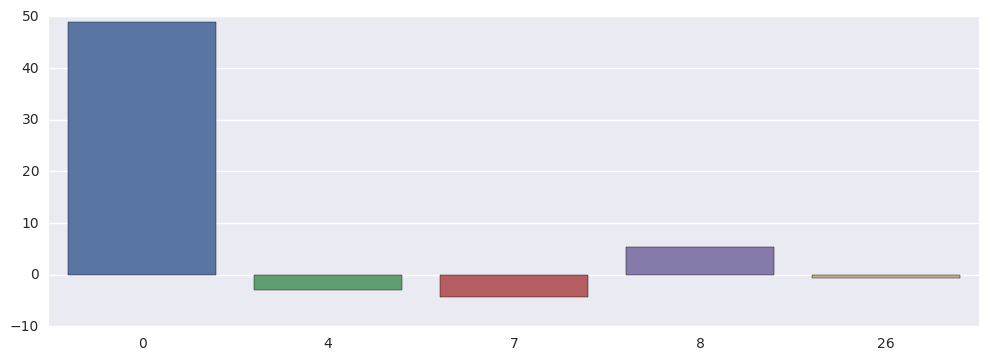

Predicted: 0 | Expected: 0


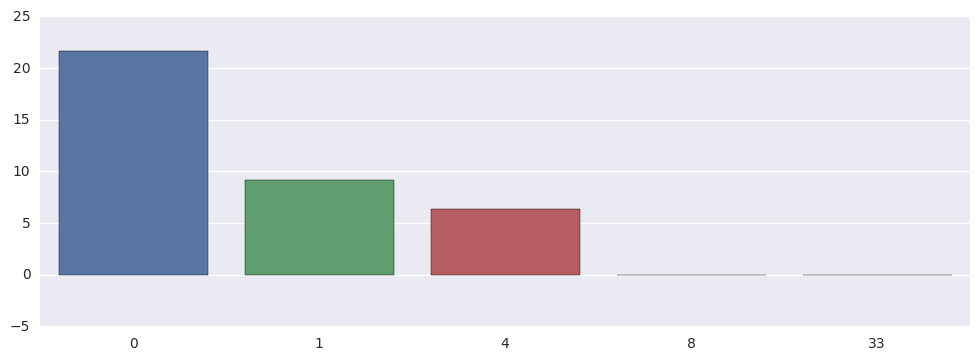

In [73]:
import seaborn as sb

pr = tf.argmax(logits, 1)
tk = tf.nn.top_k(logits, 5)

with tf.Session() as sess:
    saver.restore(sess, "./trafficSign_2017-01-12 18:49:45.767418")
    c, acc, top_k, preds = sess.run([cost, accuracy, tk, pr], feed_dict={x: X_train, y: y_train_encoded, keep_prob: 1.})
         #cost_ts, acc_ts = sess.run([cost, accuracy], feed_dict={x: X_test, y: y_test_encoded, keep_prob: 1.})
    print("Cost:  {:.5f}  | Accuracy:  {:.5f}".format(c, acc))
    
for i in range(10):
    #print(images_test[i])
    print("Predicted: {} | Expected: {}".format(preds[i], y_train[i]))
    fig = plt.figure(figsize=(12,4))
    sb.barplot(x=top_k[1][i], y=top_k[0][i])
    plt.show()

**show top 10 in new data**

In [ ]:
import seaborn as sb

pr = tf.argmax(logits, 1)
tk = tf.nn.top_k(logits, 5)

with tf.Session() as sess:
    saver.restore(sess, "./trafficSign_2017-01-12 18:49:45.767418")
    c, acc, top_k, preds = sess.run([cost, accuracy, tk, pr], feed_dict={x: X_new, y: y_new_encoded, keep_prob: 1.})
         #cost_ts, acc_ts = sess.run([cost, accuracy], feed_dict={x: X_test, y: y_test_encoded, keep_prob: 1.})
    print("Cost:  {:.5f}  | Accuracy:  {:.5f}".format(c, acc))
    
for i in range(10):
    #print(images_test[i])
    print("Predicted: {} | Expected: {}".format(preds[i], y_new[i]))
    fig = plt.figure(figsize=(12,4))
    sb.barplot(x=top_k[1][i], y=top_k[0][i])
    plt.show()

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.